[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Mura_New.ipynb)

In [3]:
import json
from pprint import pprint
from google.colab import auth
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload
import pickle

In [4]:
auth.authenticate_user()
drive_service = build('drive', 'v3')

In [5]:
def _create_file_request(file_id):
    return drive_service.files().get_media(fileId=file_id)


def _download_response_bytes(request, print_progress=False):
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    
    for status in _progbar(downloader):
        if print_progress:
            print("Downloaded {}/{} bytes".format(status.resumable_progress, status.total_size))
  
    downloaded.seek(0)
    return downloaded.read()

  
def _progbar(downloader):
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        yield status


def get_file_id(name):
    return get_matching_files(name)[0]['id']


def move_from_drive_to_disk(file_names, file_destinations):
    for file_name, dest in zip(file_names, file_destinations):
        file_id = get_file_id(file_name)
        print('Downloading file: "{}"'.format(file_name))
        file_bytes = _download_response_bytes(_create_file_request(file_id), print_progress=True)
        with open(dest, "wb") as f:
            f.write(file_bytes)


def load_pickled_files(file_names):
    for name in file_names:
        yield pickle.load(open(name, "rb"))
        

def get_matching_files(name):
    drive_files_response = _download_response_bytes(drive_service.files().list())
    drive_files_response_dict = json.loads(
        drive_files_response.decode('utf-8')
    )
    drive_files_dict = drive_files_response_dict['files']
  
    matching_records = [
        record
        for record in drive_files_dict
        if record['name'] == name
    ]

    no_records = len(matching_records)
    if no_records == 0:
        raise ValueError('no such file: "{}" on your Google Drive'.format(name))
    elif no_records > 1:
        print('warning: multiple matches for file "{}"'.format(name))
    return matching_records

In [16]:
from google.colab import files
uploaded = files.upload()

Saving Sample1.zip to Sample1.zip


In [2]:
!wget --header="Host: fs7.transfernow.net" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,ta;q=0.8" --header="Cookie: _ga=GA1.2.416711857.1530855292; _gid=GA1.2.436562772.1531041614; _gat=1; session=eyJ0cmFuc2Zlci12aWV3LTYzOTc4Nzg1NDkzNDgzNTIiOiIyMDE4LTA3LTA4IDA5OjIwOjExLjA5MTE0MCIsIjgwNXQ2MDIyanRjeS1kb3dubG9hZHMiOjJ9|1531041629|16ed7b790b1222d9857780f00df5df8e8ed9c6dd" --header="Connection: keep-alive" "https://fs7.transfernow.net/download/5b3f02a6a0e81/master/MURA-v1.1.zip" -O "MURA-v1.1.zip" -c

--2018-07-08 17:23:49--  https://fs7.transfernow.net/download/5b3f02a6a0e81/master/MURA-v1.1.zip
Resolving fs7.transfernow.net (fs7.transfernow.net)... 163.172.21.18
Connecting to fs7.transfernow.net (fs7.transfernow.net)|163.172.21.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383652532 (366M) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip        61%[===========>        ] 223.22M  4.90MB/s    eta 29s    

MURA-v1.1.zip       100%[===================>] 365.88M  4.90MB/s    in 74s     

2018-07-08 17:25:03 (4.93 MB/s) - ‘MURA-v1.1.zip’ saved [383652532/383652532]



In [3]:
!unzip MURA-v1.1.zip

Archive:  MURA-v1.1.zip
   creating: MURA-v1.1/
  inflating: MURA-v1.1/.DS_Store     
   creating: __MACOSX/
   creating: __MACOSX/MURA-v1.1/
  inflating: __MACOSX/MURA-v1.1/._.DS_Store  
   creating: MURA-v1.1/train/
  inflating: MURA-v1.1/train/.DS_Store  
   creating: __MACOSX/MURA-v1.1/train/
  inflating: __MACOSX/MURA-v1.1/train/._.DS_Store  
  inflating: MURA-v1.1/train/train_XR_FINGER.csv  
  inflating: __MACOSX/MURA-v1.1/train/._train_XR_FINGER.csv  
   creating: MURA-v1.1/train/XR_FINGER/
  inflating: MURA-v1.1/train/XR_FINGER/.DS_Store  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._.DS_Store  
   creating: MURA-v1.1/train/XR_FINGER/patient00011/
   creating: MURA-v1.1/train/XR_FINGER/patient00011/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient00011/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00011/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00011/study1_ne


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00861/study1_negative/._image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00861/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient00861  
   creating: MURA-v1.1/train/XR_FINGER/patient00866/
   creating: MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00866/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00866/study1_negative/._image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient00866/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient00866  
   crea

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01591/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient01591/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01591/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01591/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient01591  
   creating: MURA-v1.1/train/XR_FINGER/patient01592/
   creating: MURA-v1.1/train/XR_FINGER/patient01592/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient01592/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01592/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01592/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01592/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient01592/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient01592/study1_negat

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02433/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient02433/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02433/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02433/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient02433  
   creating: MURA-v1.1/train/XR_FINGER/patient02434/
   creating: MURA-v1.1/train/XR_FINGER/patient02434/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient02434/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02434/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02434/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02434/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient02434/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient02434/study1_posit


   creating: MURA-v1.1/train/XR_FINGER/patient03154/
   creating: MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03154/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03154  
   creating: MURA-v1.1/train/XR_FINGER/patient03165/
   creating: MURA-v


   creating: MURA-v1.1/train/XR_FINGER/patient03255/
   creating: MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03255/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03255  
   creating: MURA-v1.1/train/XR_FINGER/patient03256/
   creating: MURA-v


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03295/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03295/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03295/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03295/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03295  
   creating: MURA-v1.1/train/XR_FINGER/patient03296/
   creating: MURA-v1.1/train/XR_FINGER/patient03296/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03296/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03296/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03296/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03296/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03296/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03296/study1_posi


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03336/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03336  
   creating: MURA-v1.1/train/XR_FINGER/patient03337/
   creating: MURA-v1.1/train/XR_FINGER/patient03337/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03337/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03337/
   creatin


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03378/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03378/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03378  
   creating: MURA-v1.1/train/XR_FINGER/patient03379/
   creating: MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03379/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03379/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03379/study1_posi

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03419/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03419/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03419  
   creating: MURA-v1.1/train/XR_FINGER/patient03420/
   creating: MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03420/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03420/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03420/study1_posit


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03460/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03460/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03460/study1_positive/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03460/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03460  
   creating: MURA-v1.1/train/XR_FINGER/patient03461/
   creating: MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03461/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03461/study1_positive/._image2.png  
  inflating: 

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03500/study1_positive/._image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03500/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03500  
   creating: MURA-v1.1/train/XR_FINGER/patient03501/
   creating: MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03501/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03501/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03501/study1_posit

  inflating: MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03537/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03537  
   creating: MURA-v1.1/train/XR_FINGER/patient03538/
   creating: MURA-v1.1/train/XR_FINGER/patient03538/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03538/study1_positive/image

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/._image4.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03579/study1_positive/._image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03579/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03579  
   creating: MURA-v1.1/train/XR_FINGER/patient03580/
   creating: MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03580/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03580/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03580/study1_posit


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03612/study1_positive/._image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03612/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03612  
   creating: MURA-v1.1/train/XR_FINGER/patient03613/
   creating: MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03613/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03613/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03613/study1_posi


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03657/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03657/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03657  
   creating: MURA-v1.1/train/XR_FINGER/patient03658/
   creating: MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03658/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03658/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03658/study1_posi

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03701/study1_positive/._image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03701/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03701  
   creating: MURA-v1.1/train/XR_FINGER/patient03702/
   creating: MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03702/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03702/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03702/study1_posit

  inflating: MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03747/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03747  
   creating: MURA-v1.1/train/XR_FINGER/patient03748/
   creating: MURA-v1.1/train/XR_FINGER/patient03748/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03748/study1_positive/image


  inflating: MURA-v1.1/train/XR_FINGER/patient03797/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03797/study1_positive/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03797/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03797/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03797/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03797  
   creating: MURA-v1.1/train/XR_FINGER/patient03798/
   creating: MURA-v1.1/train/XR_FINGER/patient03798/study1_positive/
  inflating: MURA-v1.1/train/XR_FINGER/patient03798/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03798/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03798/study1_positive/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03798/study1_positive/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03798/study1_positive/imag


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03835/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03835/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03835/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03835/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03835  
   creating: MURA-v1.1/train/XR_FINGER/patient03836/
   creating: MURA-v1.1/train/XR_FINGER/patient03836/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient03836/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03836/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03836/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03836/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03836/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03836  
   crea

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03881/study1_negative/._image4.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03881/study1_negative/image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03881/study1_negative/._image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03881/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03881  
   creating: MURA-v1.1/train/XR_FINGER/patient03882/
   creating: MURA-v1.1/train/XR_FINGER/patient03882/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient03882/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03882/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03882/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03882/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03882/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03882/study1_negat

  inflating: MURA-v1.1/train/XR_FINGER/patient03932/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03932/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03932/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03932/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03932/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03932  
   creating: MURA-v1.1/train/XR_FINGER/patient03933/
   creating: MURA-v1.1/train/XR_FINGER/patient03933/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient03933/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03933/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03933/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03933/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03933/._study1_neg


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03976/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient03976  
   creating: MURA-v1.1/train/XR_FINGER/patient03977/
   creating: MURA-v1.1/train/XR_FINGER/patient03977/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient03977/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient03977/
   creatin


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04017/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04017  
   creating: MURA-v1.1/train/XR_FINGER/patient04018/
   creating: MURA-v1.1/train/XR_FINGER/patient04018/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04018/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04018/
   creatin


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/._study1_negative  
   creating: MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04061/study2_negative/._image1.png  
  inflating: MURA-v1


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04102/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04102  
   creating: MURA-v1.1/train/XR_FINGER/patient04103/
   creating: MURA-v1.1/train/XR_FINGER/patient04103/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04103/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04103/
   creatin

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04142  
   creating: MURA-v1.1/train/XR_FINGER/patient04143/
   creating: MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04143/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04143/study1_negative/._image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04143/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04143  
   creating: MURA-v1.1/train/XR_FINGER/patient04144/
   creating: MURA-v1.1/train/XR_FINGER/patient04144/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04144/study1_


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04179/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04179/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04179/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04179/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04179  
   creating: MURA-v1.1/train/XR_FINGER/patient04180/
   creating: MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04180/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04180/study1_negative/._image2.png  
  inflating: 

   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04219/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04219/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04219/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04219/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04219/study1_negative/._image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04219/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04219  
   creating: MURA-v1.1/train/XR_FINGER/patient04220/
   creating: MURA-v1.1/train/XR_FINGER/patient04220/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04220/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04220/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04220/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04220/study1_negative/._image1.png  
  inflating: M


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04267/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04267  
   creating: MURA-v1.1/train/XR_FINGER/patient04268/
   creating: MURA-v1.1/train/XR_FINGER/patient04268/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04268/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04268/
   creatin


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04311/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04311  
   creating: MURA-v1.1/train/XR_FINGER/patient04312/
   creating: MURA-v1.1/train/XR_FINGER/patient04312/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04312/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04312/
   creatin


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04363/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04363/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04363  
   creating: MURA-v1.1/train/XR_FINGER/patient04364/
   creating: MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04364/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04364/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04364/study1_nega


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04404/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04404/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04404/study1_negative/._image3.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04404/study1_negative/image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04404/study1_negative/._image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04404/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04404  
   creating: MURA-v1.1/train/XR_FINGER/patient04405/
   creating: MURA-v1.1/train/XR_FINGER/patient04405/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04405/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04405/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04405/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04405/study1_nega

   creating: MURA-v1.1/train/XR_FINGER/patient04458/
   creating: MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04458/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04458  
   creating: MURA-v1.1/train/XR_FINGER/patient04459/
   creating: MURA-v1

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04502/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04502/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04502  
   creating: MURA-v1.1/train/XR_FINGER/patient04503/
   creating: MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04503/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04503/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04503/study1_negat

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04550  
   creating: MURA-v1.1/train/XR_FINGER/patient04551/
   creating: MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04551/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04551  
   creat

  inflating: MURA-v1.1/train/XR_FINGER/patient04599/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04599/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04599/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04599/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04599/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04599  
   creating: MURA-v1.1/train/XR_FINGER/patient04600/
   creating: MURA-v1.1/train/XR_FINGER/patient04600/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04600/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04600/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04600/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04600/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04600/study1_negative/image2.png  
  inflating: __MACOSX/MUR


  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04657/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04657/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04657/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04657/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04657  
   creating: MURA-v1.1/train/XR_FINGER/patient04658/
   creating: MURA-v1.1/train/XR_FINGER/patient04658/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04658/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04658/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04658/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04658/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04658/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04658/study1_nega

   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04704/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04704  
   creating: MURA-v1.1/train/XR_FINGER/patient04705/
   creating: MURA-v1.1/train/XR_FINGER/patient04705/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04705/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04705/
   creating


  inflating: MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/._image3.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/image4.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/._image4.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04746/study1_negative/._image5.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04746/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04746  
   creating: MURA-v1.1/train/XR_FINGER/patient04747/
   creating: MURA-v1.1/train/XR_FINGER/patient04747/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/


   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04802/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04802/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04802/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04802/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04802  
   creating: MURA-v1.1/train/XR_FINGER/patient04803/
   creating: MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04803/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04803/study1_negative/._image2.png  
  inflating: 

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04847  
   creating: MURA-v1.1/train/XR_FINGER/patient04848/
   creating: MURA-v1.1/train/XR_FINGER/patient04848/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04848/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04848/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04848/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04848/study1_negative/._image1.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04848/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04848  
   creating: MURA-v1.1/train/XR_FINGER/patient04849/
   creating: MURA-v1.1/train/XR_FINGER/patient04849/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04849/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04849/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04849/study1_negative/
  inflating

  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04892  
   creating: MURA-v1.1/train/XR_FINGER/patient04893/
   creating: MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/
  inflating: MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/image1.png  
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/
   creating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/._image1.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/image2.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/._image2.png  
  inflating: MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/study1_negative/._image3.png  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/patient04893/._study1_negative  
  inflating: __MACOSX/MURA-v1.1/train/XR_FINGER/._patient04893  
   creat

  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/._patient11431  
   creating: MURA-v1.1/valid/XR_FINGER/patient11446/
   creating: MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/
  inflating: MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/._image1.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/._image2.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11446/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/._patient11446  
   creat

  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/._patient11859  
   creating: MURA-v1.1/valid/XR_FINGER/patient11863/
   creating: MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/
  inflating: MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/._image1.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/._image2.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11863/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/._patient11863  
   creat


   creating: MURA-v1.1/valid/XR_FINGER/patient11915/
   creating: MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/
  inflating: MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/image1.png  
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/
   creating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/._image1.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/image2.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/._image2.png  
  inflating: MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/study1_positive/._image3.png  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/patient11915/._study1_positive  
  inflating: __MACOSX/MURA-v1.1/valid/XR_FINGER/._patient11915  
   creating: MURA-v1.1/valid/XR_FINGER/patient11916/
   creating: MURA-v

In [0]:
!unzip Sample1.zip

In [17]:
cd Sample

/content/Sample


In [4]:
!ls

datalab  __MACOSX  MURA-v1.1  MURA-v1.1.zip


In [5]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5bccc000 @  0x7f1579f9b1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [0]:
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils

In [8]:
#@title Default title text
!pip uninstall Pillow -y


Uninstalling Pillow-5.2.0:
  Successfully uninstalled Pillow-5.2.0


In [9]:
!pip install Pillow

  Using cached https://files.pythonhosted.org/packages/d1/24/f53ff6b61b3d728b90934bddb4f03f8ab584a7f49299bf3bde56e2952612/Pillow-5.2.0-cp36-cp36m-manylinux1_x86_64.whl


In [5]:
import PIL
print(PIL.PILLOW_VERSION)
# Need to restart to ge the Pillow version to be changed in 5.2.0

5.2.0


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from PIL import Image

In [0]:
train_path_df = pd.read_csv('MURA-v1.1/train/train_XR_FINGER.csv')
valid_path_df = pd.read_csv('MURA-v1.1/valid/valid_XR_FINGER.csv')

Some Basic function in the image processing , we can convert the .png, .jpeg into Pil.Image object  using Image.open and pil_loader into (RBG) default 
Convert it to array to see the 3 dimension shape. 
Usually Pil object will used by torch for transformation and other stuff . Make sure to install latest version of Pillow - 5.2.0

In [6]:
'''im  = Image.open('image1.png', mode='r')
print(im)
image_check = pil_loader('image1.png')
im2arr = np.array(image_check)
print(image_check)
print(im2arr.shape)
plt.imshow(image_check)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=406x512 at 0x7F0BF8CC0940>


In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""

    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        #print(img_name)
        image = pil_loader(img_name)
        labels = self.df.iloc[idx, 2]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels]

In [11]:
transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               transforms.RandomSizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                           ]))

transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               #transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               transforms.RandomSizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                           ]))

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [0]:
transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=8)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=8)

In [0]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid

In [0]:
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

torch.Size([8, 3, 224, 224]) torch.Size([8])
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


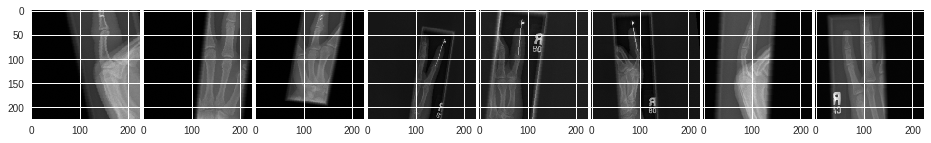

In [12]:
img, label = next(iter(transformed_train_dl))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 8), axes_pad=0.05)  
for i in range(img.size()[0]):
  #print(img)
  ax = grid[i]
  imshow(ax,img[i])
  print(label[i])

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt

In [20]:
#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)
# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized / we have updated all the layer in the resnet architecture by passing model_ft.parameters()
#to the optimizer , again SGD with momentum is preferred over Adam ?? 

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0001, momentum=0.9)


# Observe that only parameters of final layer are being optimized as
# opoosed to before.
#optimizer_conv = optim.SGD(model_ft.fc.parameters(), lr=0.001, momentum=0.9)



# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


# Decay LR by a factor of 0.1 every 7 epochs -- only last layer
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [83]:
# Dense Net
model_ft = models.densenet169(pretrained=True)
model_ft.features.
model_ft.9



model_ft_res = models.resnet18(pretrained=True)
model_ft_res.

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [0]:
dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}

In [18]:
#!ls
print(dataset_sizes)

{'train': 5106, 'val': 461}


In [21]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------
train Loss: 0.5933 Acc: 0.9215
val Loss: 4.5464 Acc: 0.4642

Epoch 1/19
----------
train Loss: 0.3024 Acc: 0.9391
val Loss: 3.9852 Acc: 0.4642

Epoch 2/19
----------
train Loss: 0.2394 Acc: 0.9430
val Loss: 3.4844 Acc: 0.4642

Epoch 3/19
----------
train Loss: 0.2251 Acc: 0.9422
val Loss: 3.5230 Acc: 0.4642

Epoch 4/19
----------
train Loss: 0.2214 Acc: 0.9424
val Loss: 3.4504 Acc: 0.4642

Epoch 5/19
----------
train Loss: 0.2193 Acc: 0.9416
val Loss: 3.3553 Acc: 0.4642

Epoch 6/19
----------
train Loss: 0.2169 Acc: 0.9399
val Loss: 3.4082 Acc: 0.4642

Epoch 7/19
----------
train Loss: 0.9036 Acc: 0.7107
val Loss: 1.9666 Acc: 0.4534

Epoch 8/19
----------
train Loss: 0.5232 Acc: 0.7830
val Loss: 1.8403 Acc: 0.4642

Epoch 9/19
----------
train Loss: 0.5126 Acc: 0.7828
val Loss: 1.9027 Acc: 0.4534

Epoch 10/19
----------
train Loss: 0.5057 Acc: 0.7842
val Loss: 1.8001 Acc: 0.4642

Epoch 11/19
----------
train Loss: 0.5021 Acc: 0.7875
val Loss: 1.8397 Acc: 0.4577

Ep